In [32]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib
import math
%matplotlib notebook

SPINE_COLOR = "grey"

#  markersize=3 ,elinewidth = 0.6

def savefig(filename):
    plt.tight_layout()
    #plt.savefig('figure_{}.pgf'.format(filename),bbox_inches='tight')
    plt.savefig('{}.pdf'.format(filename),bbox_inches='tight')
    plt.show()
    #else:
        #plt.show()


def latexify(fig_width=None, ratio = (math.sqrt(5)-1.0)/2.0 ,fig_height=None):
    fig_width_pt = 455.24413     # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.0#.27  # Convert pt to inch

    if fig_width is None:
        fig_width = fig_width_pt*inches_per_pt
    elif fig_height is None:
        fig_width = fig_width*fig_width_pt*inches_per_pt

    if fig_height is None:
        #golden_mean = 0.8
        golden_mean = ratio# Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 10.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
                 "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES
    matplotlib.rc('axes',edgecolor="#595959")
    params = {
          'backend': 'ps',
          #'text.latex.preamble': ['\usepackage{gensymb}'],
          'axes.labelsize': 10, # fontsize for x and y labels (was 10)
          'axes.titlesize': 11,
          'font.size':       10, # was 10
          'legend.fontsize': 10, # was 10
          'xtick.labelsize': 9,
          'ytick.labelsize': 9,
          'text.usetex': True,
          'pgf.texsystem': "pdflatex",
          'figure.figsize': [fig_width,fig_height],
          'font.family': "sans-serif",
          'font.serif': ['Computer Modern Roman'],  # blank entries should cause plots to inherit fonts from the document
          'font.sans-serif': ['Computer Modern Sans serif']
        }
        
    matplotlib.rcParams.update(params)

def format_axes(ax, ax2,  two_axes = False, log = None):
    if True:
        if two_axes == False:
            for spine in ['top', 'right']:
                ax.spines[spine].set_visible(False)
            for spine in ['left', 'bottom']:
                ax.spines[spine].set_color(SPINE_COLOR)
                ax.spines[spine].set_linewidth(0.5)
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')
            i=0
            for axis in [ax.xaxis, ax.yaxis]:
                axis.set_tick_params(direction='out', color=SPINE_COLOR)
                if i==0 and log == 'x':
                    axis.set_tick_params(direction='out', which = 'minor', color=SPINE_COLOR)
                if i == 1 and log == 'y':
                    axis.set_tick_params(direction='out', which = 'minor', color=SPINE_COLOR)
                i = i+1
        else:
            for spine in ['top']:
                ax.spines[spine].set_visible(False)
                ax2.spines[spine].set_visible(False)
            for spine in ['left', 'bottom']:
                ax.spines[spine].set_color(SPINE_COLOR)
                ax.spines[spine].set_linewidth(0.5)
            for spine in ['right']:
                ax2.spines[spine].set_color(SPINE_COLOR)
                ax2.spines[spine].set_linewidth(0.5)
            ax2.yaxis.set_ticks_position('right')
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')
            
            for axis in [ax.xaxis, ax.yaxis, ax2.yaxis]:
                axis.set_tick_params(direction='out', color=SPINE_COLOR)
            ax2.set_axisbelow(False)
        ax.set_axisbelow(False)
        
        #ax.grid(color = "#595959", ls = '-', lw = 0.4, alpha = 0.3)
    
    return ax



<IPython.core.display.Javascript object>


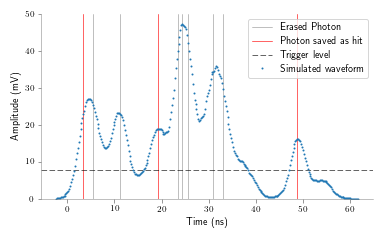

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

hits = [
5.42278,
11.2194,
23.3919,
24.3479,
25.5392,
30.9642,
33.0784
]
realhits = [
    3.4066,
    19.2291,
    48.8187  
]
latexify(0.85)
fig, ax = plt.subplots()
ax = format_axes(ax,ax, False)

time, amplitude = np.loadtxt("WavesFORTHESIS",usecols=(0,1),unpack=True,comments=":")
j = 0
for i in hits:
    if j==0:
        plt.axvline(i, linewidth = 0.5, color = "gray", label = "Erased Photon")
    else:
        plt.axvline(i, linewidth = 0.5, color = "gray")
    j = j+1
    
j = 0
for i in realhits:
    if j==0:
        plt.axvline(i, linewidth = 0.6, color = "r", label = "Photon saved as hit")
    else:
        plt.axvline(i, linewidth = 0.6, color = "r")
    j = j+1
plt.xlabel("Time (ns)")
plt.ylabel("Amplitude (mV)")
plt.axhline(8, linewidth = 0.6, ls = "--", color = "black", label = "Trigger level")
plt.ylim(0,50)
plt.plot(time,amplitude, '.', markersize= 2, label="Simulated waveform")
plt.legend()
plt.show()

savefig("waveforms085")

<IPython.core.display.Javascript object>


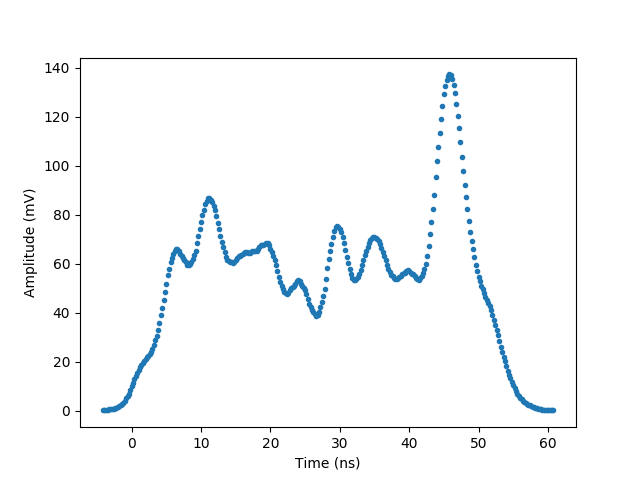

In [61]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
time, amplitude = np.loadtxt("WavesNice",usecols=(0,1),unpack=True,comments=":")
plt.ylabel("Amplitude (mV)")
plt.xlabel("Time (ns)")
plt.plot(time,amplitude, '.')
plt.show()

29.8
37.8
45.8
53.8


<IPython.core.display.Javascript object>


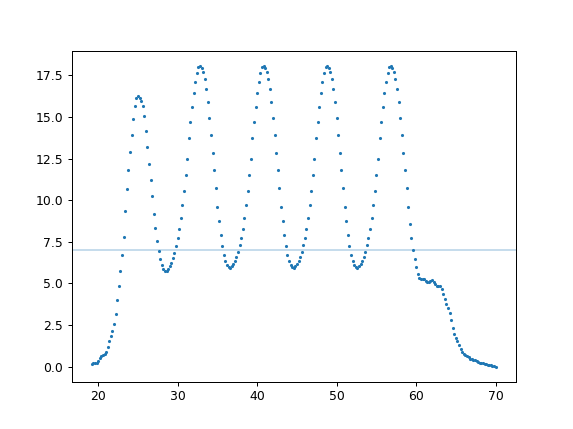

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook



time, amplitude = np.loadtxt("1PE.txt",usecols=(0,1),unpack=True,comments=":")
photontime= [42.891,52]
photontime = [25,33,41,49,57]
spacing = 0.2
Wavtime = np.array([])
Wavamplitude = np.array([])

for t in photontime:
    for i in range(0,len(time)):
        Wavtime = np.append(Wavtime, time[i]+t)
        Wavamplitude = np.append(Wavamplitude, amplitude[i])
        
time_min = np.amin(Wavtime)
time_amax = np.amax(Wavtime)

Amplitude = np.array([])
for k in range(0,int(round(time_amax-time_min)/spacing)):
    Amplitude = np.append(Amplitude,0)

for t in range(0,Wavtime.size):
    index = int(round((Wavtime[t]-time_min)/spacing))
    old = Amplitude[index]
    Amplitude[index] = old + Wavamplitude[t]
time = np.array([])
for t in range(0,Amplitude.size):
    time = np.append(time, t*spacing+time_min)
    
UnderThreshold = True
firstTime = True
Threshold = 7
k = 0
for a in Amplitude:
    
    if (a < Threshold and UnderThreshold == False):
        UnderThreshold = True
    if (a > Threshold and UnderThreshold == True and firstTime == False ):
        print time[k]
        UnderThreshold = False
    if (a>Threshold and UnderThreshold == True and firstTime ==True):
        firstTime = False
        UnderThreshold = False
        
        
    k = k+1
    

plt.axhline(7, linewidth = 0.4)
#plt.ylim(0,50)
plt.plot(time,Amplitude, '.', markersize= 3)
plt.show()

1018.22851064


<IPython.core.display.Javascript object>


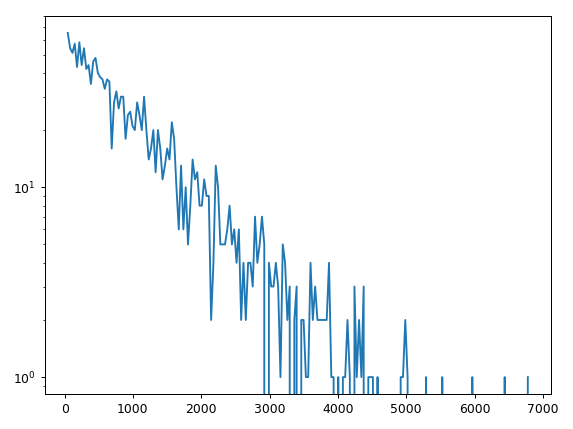

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
from scipy.optimize import curve_fit
%matplotlib notebook
def expDeC(x,a,b):
    return a*np.exp(-(x)*b)
t, p, s = np.loadtxt("K40",usecols=(1,2,3), unpack=True)
t = t[s!=0]

h , edges = np.histogram(t[t>30],200)
x = np.array([])

for i in range(0,len(edges)-1):
    x = np.append(x, edges[i]+(edges[i+1]-edges[i])/2) 
Initial = [10,1./1000.]   
popt, pcov = curve_fit(expDeC, x, h, p0 = Initial)
print 1/popt[1]
plt.yscale('log')
plt.plot(x,h)
plt.tight_layout()
plt.show()

In [61]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Thu Mar 30 15:16:25 2017

@author: m_unla02
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
times = np.logspace(start=0, stop=4, num=25, base = 10)

def expDeC(x,a,b):
    return a*np.exp(-(x)*b)
def expDec2(x,a,b,c,d):
    return a*np.exp(-(x)*b)+ c*np.exp(-x*d)
def expDec3(x,a,b,c,d,e,f):
    return a*np.exp(-(x)*b)+ c*np.exp(-x*d) + e*np.exp(-x*f)
def fitter(t,T,p):
    h , edges = np.histogram(t,200)
    counts, xedges, yedges = np.histogram2d(t, p, bins=(200,int(np.amax(p))))
    yvalues = np.linspace((yedges[0]+yedges[1])/2., (yedges[-1]+yedges[-2])/2., np.amax(p))
    averageP = np.array([])
    
    for i in range(0,200):
        h[i] = sum(yvalues*counts[i])
    '''
    if math.isnan(np.average(PES[PES!=0])):
        averageP = np.append(averageP, 0)
    else:
        averageP = np.append(averageP, np.average(PES[PES!=0]))
        
    '''
    x = np.array([])

    for i in range(0,len(edges)-1):
        x = np.append(x, edges[i]+(edges[i+1]-edges[i])/2)      
        
    hmax = np.amax(h)
    xmax = x[h==hmax]
    newX = np.array([])
    newH = np.array([])
    i = 0
    for xx in x:
        if xx > xmax:
            newH = np.append(newH, h[i])
            newX= np.append(newX, xx)
        i=i+1
    
    Initial = [hmax,1./T]
    theValues = np.array([])
    theErrors = np.array([])
    try:
        popt, pcov = curve_fit(expDeC, newX, newH, p0 = Initial)
        perr = np.sqrt(np.diag(pcov))
        theValues= np.append(theValues,1./popt[1])
        theErrors =np.append(theErrors, perr[1]/(popt[1])**2.)
    except Exception as inst:
        print inst
        theValues= np.append(theValues,None)
        theErrors =np.append(theErrors, None)

    return theValues,theErrors

def timeReturn(T,fileNr):
    tT = np.array([])
    pp = np.array([])
    for j in range(0,12):
        t, p = np.loadtxt('K40',usecols=(1,2), unpack=True)
        tT = np.append(tT, t[t>30])
        pp = np.append(pp,p[t>30])
    const,error = fitter(tT,T,pp)
    return const,error

yields = [50]

for y in yields:
    print "Calculating for yield", y
    real = np.array([])
    fit = np.array([])
    errorA = np.array([])

    #logFile = open("resultsCorrected-"+str(y)+".txt","w")

    for time in times:
        try:
            value,error = timeReturn(time,y)
            real = np.append(real, time)
            fit = np.append(fit, value)
            errorA = np.append(errorA, error)
            #logFile.write(str(time)+'\t'+str(value[0])+'\t'+str(error[0])+'\n')
            print time, value, error
        except Exception as inst:
            print 'error',inst
    #logFile.close()



Calculating for yield 50
1.0 [ 1.] [ inf]


/home/m_unla02/Downloads/data/lib/python2.7/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


1.46779926762 [ 1.46779927] [ inf]
2.15443469003 [ 2.15443469] [ inf]
3.16227766017 [ 3.16227766] [ inf]
4.64158883361 [ 958.16115178] [ 23.48431858]


/home/m_unla02/Downloads/data/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: overflow encountered in exp


6.81292069058 [ 958.16098545] [ 23.48400879]
10.0 [ 958.16098957] [ 23.4840165]


/home/m_unla02/Downloads/data/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: overflow encountered in multiply


14.6779926762 [ 958.16101067] [ 23.4840577]
21.5443469003 [ 958.16097824] [ 23.48399644]
31.6227766017 [ 958.16098788] [ 23.48401297]
46.4158883361 [ 958.16098152] [ 23.48400202]
68.1292069058 [ 958.16143149] [ 23.48484499]
100.0 [ 958.16098227] [ 23.48400353]
146.779926762 [ 958.16098499] [ 23.48400889]
215.443469003 [ 958.16107402] [ 23.48394058]
316.227766017 [ 958.16140926] [ 23.48476189]
464.158883361 [ 958.16108506] [ 23.48419902]
681.292069058 [ 958.16098925] [ 23.48401764]
1000.0 [ 958.16142549] [ 23.48476758]
1467.79926762 [ 958.16098459] [ 23.48400931]
2154.43469003 [ 958.16098625] [ 23.48401184]
3162.27766017 [ 958.16099641] [ 23.48402967]
4641.58883361 [ 958.16129468] [ 23.48460309]
6812.92069058 [ 958.16098197] [ 23.48400179]
10000.0 [ 958.16096925] [ 23.48397895]


In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib notebook

def expDeC(x,a,b):
    return a*np.exp(-(x)*b)

def fitter(t,T):
    h , edges = np.histogram(t,200)
    x = np.array([])
    for i in range(0,len(edges)-1):
        x = np.append(x, edges[i]+(edges[i+1]-edges[i])/2)
    Initial = [np.amax(h),1./T]
    try:
        popt, pcov = curve_fit(expDeC, x, h, p0 = Initial)
        perr = np.sqrt(np.diag(pcov))
        return 1./popt[1], perr[1]/(popt[1])**2.
    except Exception as inst:
        print inst
        return None
def timeReturn(T,y):
    tT = np.array([])
    for j in range(0,12):
        try:
            t = np.loadtxt("K40",usecols=(1,), unpack=True)
            tT = np.append(tT, t[t>30])
        except:
            pass
    if tT.size>0:
        #tT = tT[tT!=0]
        const,error = fitter(tT,T)
        return const,error
    else: 
        raise

times = np.logspace(start=0, stop=4, num=25, base = 10)
yields = [50,100]

for y in yields:
    real = np.array([])
    fit = np.array([])
    errorA = np.array([])
    #logFile = open("results"+str(int(y))+".txt","w")

    for time in times:
        try:
            value,error = timeReturn(time,y)
            real = np.append(real, time)
            fit = np.append(fit, value)
            errorA = np.append(errorA, error)
            #logFile.write(str(time)+'\t'+str(value)+'\t'+str(error)+'\n')
            print time, value, error
        except Exception as inst:
            print 'error',inst
    #logFile.close()




1.0 1.0 inf
1.46779926762 1.46779926762 inf
2.15443469003 2.15443469003 inf


/home/m_unla02/Downloads/data/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: overflow encountered in exp


3.16227766017 1014.33922828 23.8470697123
4.64158883361 1014.33922918 23.8469000951
6.81292069058 1014.33920137 23.8472660269


/home/m_unla02/Downloads/data/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: overflow encountered in multiply


10.0 1014.33920182 23.8472570009
14.6779926762 1014.33924204 23.846928238
21.5443469003 1014.33920331 23.8472534683
31.6227766017 1014.33926818 23.8467695378
46.4158883361 1014.33920117 23.8472662425
68.1292069058 1014.3392032 23.8472441851
100.0 1014.33921189 23.8471811903
146.779926762 1014.33927398 23.8466479404
215.443469003 1014.33921758 23.8471350186
316.227766017 1014.33919624 23.847301618
464.158883361 1014.33920641 23.8472371423
681.292069058 1014.33920716 23.8472181661
1000.0 1014.33919606 23.8473007316
1467.79926762 1014.33920201 23.8472627377
2154.43469003 1014.33926314 23.8467994932
3162.27766017 1014.33920404 23.8472420085
4641.58883361 1014.33922753 23.8470712616
6812.92069058 1014.33930895 23.8465586674
10000.0 1014.33920057 23.8472633419
1.0 1.0 inf
1.46779926762 1.46779926762 inf
2.15443469003 2.15443469003 inf
3.16227766017 1014.33922828 23.8470697123
4.64158883361 1014.33922918 23.8469000951
6.81292069058 1014.33920137 23.8472660269
10.0 1014.33920182 23.8472570009
